In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [26]:
import pickle
with open('credit.pkl', 'rb') as f:
    x_credit_train, x_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [11]:
x_credit_train.shape, y_credit_train.shape

((27693, 3), (27693,))

In [12]:
x_credit_test.shape, y_credit_test.shape

((4888, 3), (4888,))

## Concatenating database

In [27]:
x_credit = np.concatenate((x_credit_train, x_credit_test), axis=0)


In [14]:
x_credit.shape

(32581, 3)

In [28]:
y_credit = np.concatenate((y_credit_train, y_credit_test), axis = 0)


In [16]:
y_credit.shape

(32581,)

### Decision Tree

In [29]:
parameters = {'criterion': ['gini', 'entropy'],
'splitter': ['best','random'],
'min_samples_split': [2,5,10],
'min_samples_leaf': [2,5,10]}


In [30]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [31]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [32]:
best_params,best_score

({'criterion': 'gini',
  'min_samples_leaf': 10,
  'min_samples_split': 5,
  'splitter': 'best'},
 0.8291643388548042)

### Random Forest

In [33]:
parameters = {'criterion': ['gini', 'entropy'],
'n_estimators': [10,40,100, 200],
'min_samples_split': [2,5,10],
'min_samples_leaf': [3,5,10]}

In [34]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)


KeyboardInterrupt: 

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 40}
0.842085976583131


### KNN

In [ ]:
parameters = {'n_neighbors': [3,5,10,20,25,30,35,40],
'p': [1,2]}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20, 25, 30, 35, 40],
                         'p': [1, 2]})

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'n_neighbors': 25, 'p': 2}
0.8284275210520381


### Logistic Regression

In [ ]:
parameters = {'tol': [0.0001,0.00001,0.000001],
'C':[1.0,1.5,2.0,2.5],
'solver': ['lbfgs', 'sag', 'saga']}

In [24]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)

ValueError: Invalid parameter 'criterion' for estimator LogisticRegression(). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'C': 2.5, 'solver': 'sag', 'tol': 0.0001}
0.7932843816987879


### SVM

In [ ]:
parameters = {'tol':[0.001, 0.0001, 0.00001],
'C': [1.0, 1.5, 2.0], 'kernel': ['rbf','linear','poly','sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

### Neural Network

In [ ]:
parameters = {'activation':['relu','logistic','tahn'], 'solver':['adam','sgd'], 'batch_size':[10, 56] }

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

### Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score, KFold

In [36]:
tree_results = []
random_forest_results = []
knn_results = []
logistic_results = []




for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)


    # decision tree
    tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf= 10, min_samples_split= 5, splitter= 'best')
    scores = cross_val_score(tree, x_credit, y_credit, cv= kfold)

    tree_results.append(scores.mean())

    #random forest

    random_forest = RandomForestClassifier(criterion='gini', min_samples_leaf= 13, min_samples_split=2, n_estimators= 40)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv= kfold)

    random_forest_results.append(scores.mean())

    # knn 

    knn = KNeighborsClassifier(n_neighbors= 25, p = 2)
    scores = cross_val_score(knn, x_credit, y_credit, cv= kfold)

    knn_results.append(scores.mean())

    # LogisticRegression
    logistic = LogisticRegression(C= 2.5, solver='sag', tol= 0.0001)
    scores = cross_val_score(logistic, x_credit, y_credit, cv= kfold)

    logistic_results.append(scores.mean())

    # 


In [ ]:
svm_results = []
neural_network_results = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    # svm 
    svm = SVC(kernel= 'rbf', C= 2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv= kfold)

    svm_results.append(scores.mean())

    # neural_network

    neural = MLPClassifier(activation='relu',batch_size= 56, solver='adam')
    scores = cross_val_score(neural, x_credit, y_credit, cv= kfold)

    neural_network_results.append(scores.mean())


C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
results = pd.DataFrame({'Tree': tree_results,
'Random Forest': random_forest_results, 
'KNN': knn_results, 'Logistic Regression': logistic_results})
# did not incluse SVM and Neural Network for momery optimization

results



,Tree,Random Forest,KNN,Logistic Regression
0,0.829348,0.839631,0.827445,0.792978
1,0.831220,0.839446,0.829195,0.793407
2,0.831190,0.839876,0.828765,0.793038
3,0.829993,0.839845,0.828673,0.793346
4,0.830085,0.839661,0.828489,0.793223
5,0.831835,0.838955,0.827998,0.793284
6,0.830146,0.839937,0.829256,0.793407
7,0.829778,0.840336,0.829655,0.793223
8,0.829932,0.839508,0.829256,0.793438
9,0.829226,0.839447,0.828950,0.793500


In [42]:
results.describe()

,Tree,Random Forest,KNN,Logistic Regression
count,30.000000,30.000000,30.000000,30.000000
mean,0.830248,0.839885,0.828826,0.793269
std,0.000897,0.000429,0.000588,0.000159
min,0.828120,0.838955,0.827445,0.792978
25%,0.829594,0.839538,0.828497,0.793169
50%,0.830070,0.839907,0.828842,0.793315
75%,0.830936,0.840259,0.829257,0.793399
max,0.831865,0.840858,0.829717,0.793500


In [43]:
results.var()

Tree                   8.043520e-07
Random Forest          1.841714e-07
KNN                    3.460072e-07
Logistic Regression    2.532429e-08
dtype: float64

In [46]:
#Variation
(results.std()/results.mean()) * 100

Tree                   0.108023
Random Forest          0.051097
KNN                    0.070971
Logistic Regression    0.020061
dtype: float64

### Normality Tests

In [ ]:
alpha = 0.05

In [47]:
from scipy.stats import shapiro

In [49]:
shapiro(tree_results), shapiro(random_forest_results), shapiro(knn_results), shapiro(knn_results), shapiro(logistic_results)

(ShapiroResult(statistic=0.9613874554634094, pvalue=0.33596718311309814),
 ShapiroResult(statistic=0.9744692444801331, pvalue=0.6670954823493958),
 ShapiroResult(statistic=0.9645960330963135, pvalue=0.4035714268684387),
 ShapiroResult(statistic=0.9645960330963135, pvalue=0.4035714268684387),
 ShapiroResult(statistic=0.9246669411659241, pvalue=0.03550347313284874))

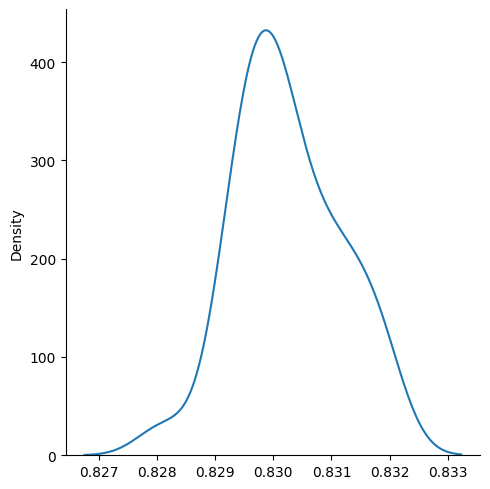

In [53]:
sns.displot(tree_results, kind='kde')

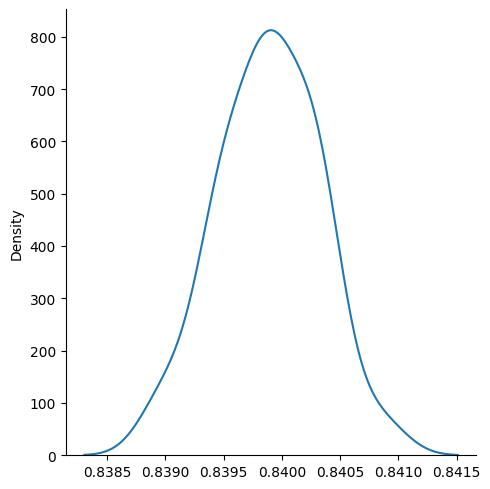

In [54]:
sns.displot(random_forest_results, kind='kde')

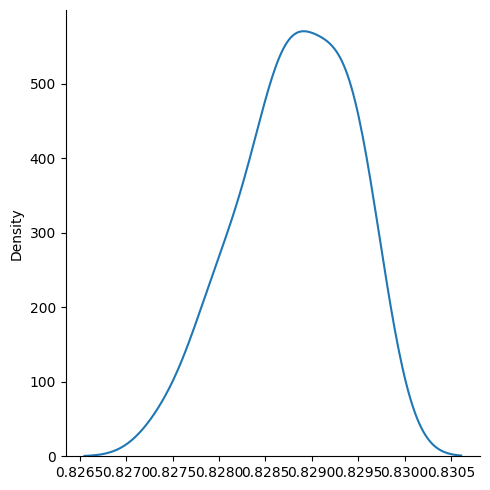

In [55]:
sns.displot(knn_results, kind='kde')

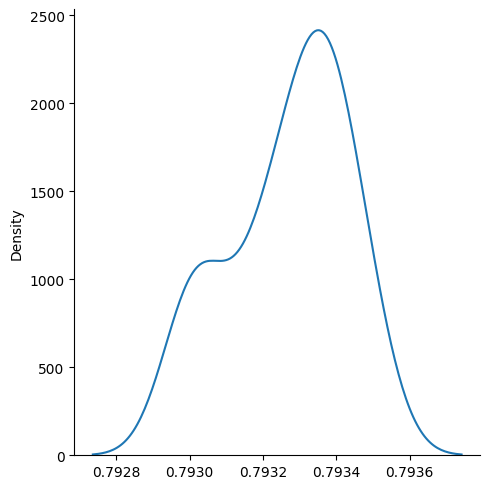

In [56]:
# p-value < alpha
sns.displot(logistic_results, kind= 'kde')

### ANOVA & Tukey hypothesis test

In [57]:
from scipy.stats import f_oneway

In [59]:
p = f_oneway(tree_results, random_forest_results, knn_results, logistic_results)
p

F_onewayResult(statistic=36930.15033958964, pvalue=1.1689772934802421e-172)

#### If p-value <= than alpha, then H0 is rejected. Data os diffent.

#### Else, H1 is rejected and the results are the same.

In [69]:
algorithms_resoults = {'accuracy': np.concatenate([tree_results, random_forest_results, knn_results, logistic_results]),
'algorithm': ['tree','tree','tree','tree','tree',
'tree','tree','tree','tree','tree',
'tree','tree','tree','tree','tree',
'tree','tree','tree','tree','tree',
'tree','tree','tree','tree','tree',
'tree','tree','tree','tree','tree',
'random_forest','random_forest','random_forest','random_forest','random_forest',
'random_forest','random_forest','random_forest','random_forest','random_forest',
'random_forest','random_forest','random_forest','random_forest','random_forest',
'random_forest','random_forest','random_forest','random_forest','random_forest',
'random_forest','random_forest','random_forest','random_forest','random_forest',
'random_forest','random_forest','random_forest','random_forest','random_forest',
'knn','knn','knn','knn','knn',
'knn','knn','knn','knn','knn',
'knn','knn','knn','knn','knn',
'knn','knn','knn','knn','knn',
'knn','knn','knn','knn','knn',
'knn','knn','knn','knn','knn',
'logistic','logistic','logistic','logistic','logistic',
'logistic','logistic','logistic','logistic','logistic',
'logistic','logistic','logistic','logistic','logistic',
'logistic','logistic','logistic','logistic','logistic',
'logistic','logistic','logistic','logistic','logistic',
'logistic','logistic','logistic','logistic','logistic']}

In [72]:
results_df = pd.DataFrame(algorithms_resoults)
results_df

,accuracy,algorithm
0,0.829348,tree
1,0.831220,tree
2,0.831190,tree
3,0.829993,tree
4,0.830085,tree
...,...,...
115,0.793162,logistic
116,0.793315,logistic
117,0.793346,logistic
118,0.793008,logistic


In [73]:
from statsmodels.stats.multicomp import MultiComparison

In [76]:
algorithm_comparison = MultiComparison(results_df['accuracy'], results_df['algorithm'])


In [78]:
statistic_test = algorithm_comparison.tukeyhsd()
print(statistic_test)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
          knn      logistic  -0.0356  -0.0 -0.0359 -0.0352   True
          knn random_forest   0.0111  -0.0  0.0107  0.0115   True
          knn          tree   0.0014  -0.0   0.001  0.0018   True
     logistic random_forest   0.0466  -0.0  0.0462   0.047   True
     logistic          tree    0.037  -0.0  0.0366  0.0374   True
random_forest          tree  -0.0096  -0.0   -0.01 -0.0092   True
-----------------------------------------------------------------


In [79]:
results.mean()

Tree                   0.830248
Random Forest          0.839885
KNN                    0.828826
Logistic Regression    0.793269
dtype: float64

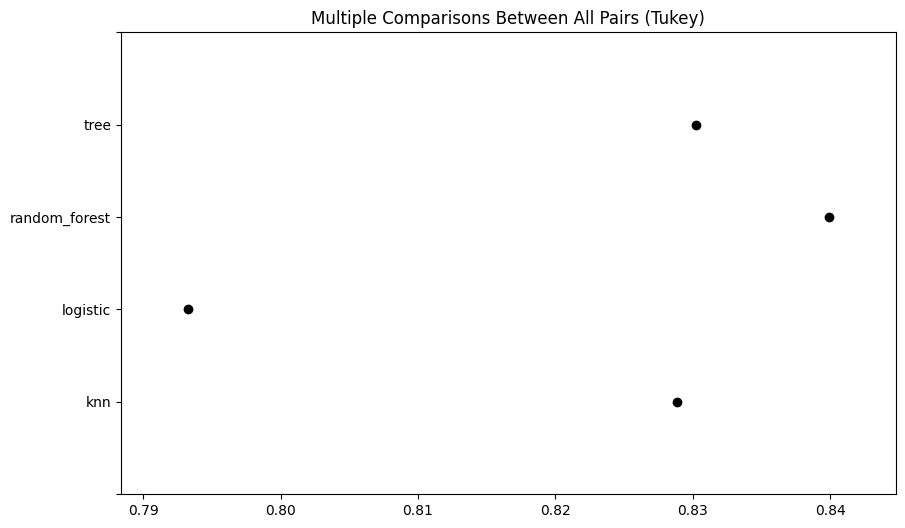

In [80]:
statistic_test.plot_simultaneous();